In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions


In [2]:
train_path=r"C:/Users/Ertuğrul\Desktop/Yeni-klasor/airplane-dataset-trans/train/"
test_path=r"C:/Users/Ertuğrul\Desktop/Yeni-klasor/airplane-dataset-trans/test/"

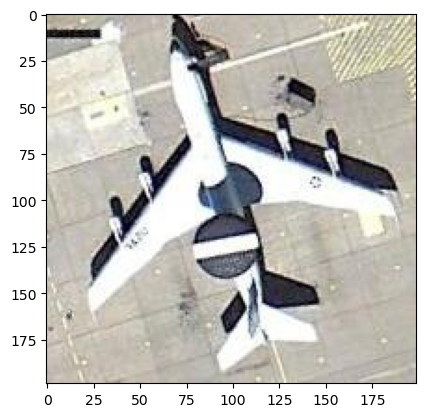

In [3]:
img=load_img(test_path+"E-3/9-79.jpg")
img_to_array(img).shape
plt.imshow(img)
plt.show()

In [4]:
train_data_generator=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))
train_data = tf.data.Dataset.from_generator(lambda: train_data_generator,
                                            output_signature=(
                                                tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                                tf.TensorSpec(shape=(None,5), dtype=tf.int32)
                                            ))
train_data=train_data.repeat(count=None)
test_data_generator=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224))
test_data = tf.data.Dataset.from_generator(lambda: test_data_generator,
                                            output_signature=(
                                                tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                                tf.TensorSpec(shape=(None,5), dtype=tf.int32)
                                            ))
test_data=test_data.repeat(count=None)



Found 2884 images belonging to 5 classes.
Found 705 images belonging to 5 classes.


In [5]:
planettype=5
vgg=VGG16()
vgg_layers=vgg.layers
vgg_layers


Son çıkış katmanını kaldırıp yerine kendi verimiz için ekleme yapalım

In [7]:
katmanlar=len(vgg_layers)-1
model=Sequential()

for i in range(katmanlar):
    model.add(vgg_layers[i])

for layers in model.layers:
    layers.trainable=False
    

In [8]:
model.add(Dense(planettype,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

                                                                 
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (

In [14]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [15]:
batch_size=4
model.fit(train_data,
                    steps_per_epoch=400//batch_size,
                    epochs=4,
                    validation_data=test_data,
                    validation_steps=200//batch_size)

Epoch 1/4


100/100 [==============================] - 354s 4s/step - loss: 0.7532 - accuracy: 0.7532 - val_loss: 0.6351 - val_accuracy: 0.7913
Epoch 2/4
100/100 [==============================] - 371s 4s/step - loss: 0.2627 - accuracy: 0.9127 - val_loss: 0.8279 - val_accuracy: 0.7945
Epoch 3/4
100/100 [==============================] - 369s 4s/step - loss: 0.1566 - accuracy: 0.9398 - val_loss: 0.5119 - val_accuracy: 0.8537
Epoch 4/4
100/100 [==============================] - 375s 4s/step - loss: 0.1254 - accuracy: 0.9574 - val_loss: 0.4600 - val_accuracy: 0.8667


In [16]:
img2=Image.open(r"C:/Users/Ertuğrul\Desktop/Yeni-klasor/airplane-dataset-trans/train/E-3/9-53.jpg").resize((224,224))
img2=np.array(img2)
img2.shape #224,224,3
img2.ndim #3
img2=img2.reshape(-1,224,224,3)
img2=preprocess_input(img2)


preprocess_input fonksiyonu, görüntüyü modelin girişine uygun bir şekilde önişleme yapmak için kulanılan bir fonksiyondur.Görüntüyü ağın eğitim veri setiyle uyumlu hale getirmek için yapılan bazı normalizasyon ve dönüşümleri uygular.Bu dönüşümler modelin öğrenme performansını artırmaya yardımcı olabilir.

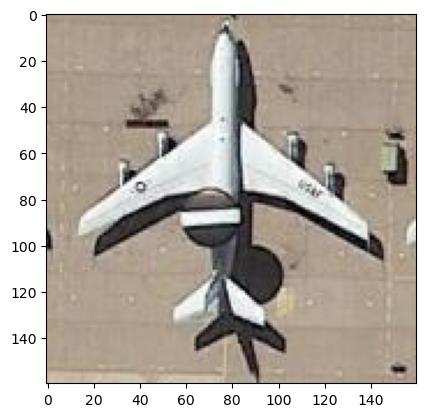

In [17]:
img_show=load_img(r"C:/Users/Ertuğrul\Desktop/Yeni-klasor/airplane-dataset-trans/train/E-3/9-53.jpg")
plt.imshow(img_show)
plt.show()

In [18]:
pred=model.predict(img2)
pred

1/1 [==============================] - 0s 223ms/step


array([[1.1175477e-03, 3.2391279e-07, 9.9886900e-01, 8.0912741e-06,
        5.0268236e-06]], dtype=float32)

In [19]:
pred[0][2]

0.998869

E-3 klasörümün indexi 2 idi, bu görselin yüzde99 E-3'e ait olduğunu tahmin etti.